# yfinance Library Assignment  

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELIANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


In [2]:

def download_historical_data(symbol, start_date, end_date, timeframe = '1d'):
  
        df = yf.download(tickers=symbol, start=start_date, end=end_date, interval=timeframe)
        return df
  


### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [3]:
def plot_closing_prices(symbol, start_date, end_date, timeframe='1d'):
    data = df(symbol,start_date,end_date,timeframe)
    # Plot closing prices
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(f"{symbol} Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Run the functions 

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

C:\Users\VARAD\AppData\Local\Temp\ipykernel_16516\3180476895.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed
C:\Users\VARAD\AppData\Local\Temp\ipykernel_16516\3180476895.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed
C:\Users\VARAD\AppData\Local\Temp\ipykernel_16516\3180476895.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=symbol, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


RELIANCE:
Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2012-01-02  160.980209  161.709291  156.560122  158.758774    18808107
2012-01-03  165.104111  165.616736  161.845988  162.278887    20489219
2012-01-04  163.167465  166.539489  162.529517  165.730666    18541902
2012-01-05  159.373932  165.172456  158.143587  162.905439    28959200
2012-01-06  163.486435  164.956005  158.724597  158.815731    20575210

TCS:
Price            Close        High         Low        Open   Volume
Ticker          TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
Date                                                               
2012-01-02  453.373962  456.201289  443.526378  446.603751  2248542
2012-01-03  460.682892  465.414373  453.912678  455.162861  2708884
2012-01-04  451.219849  463.529342  449.796582  463.490884  2386770
2012-01-

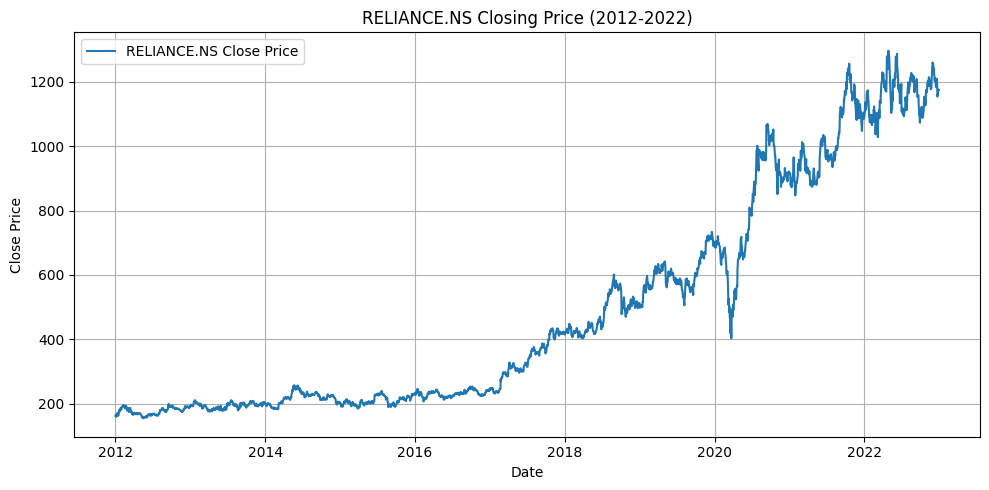

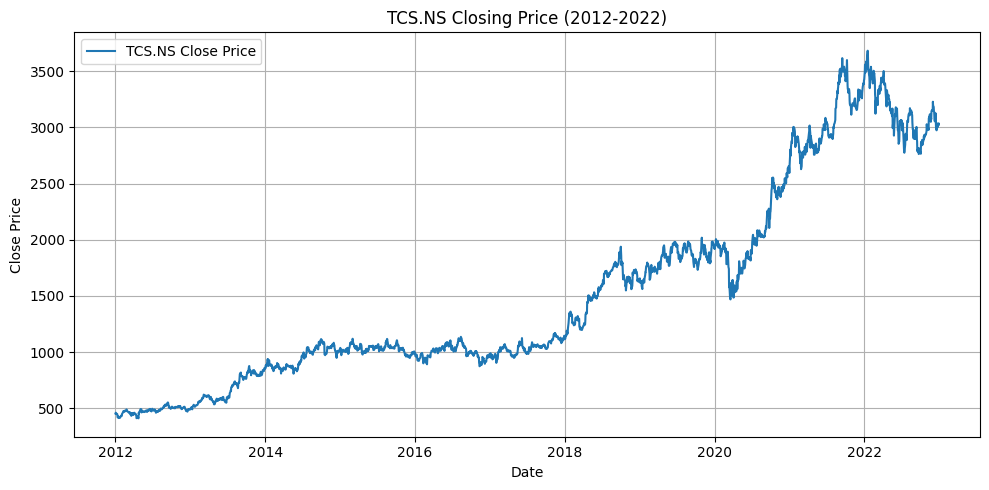

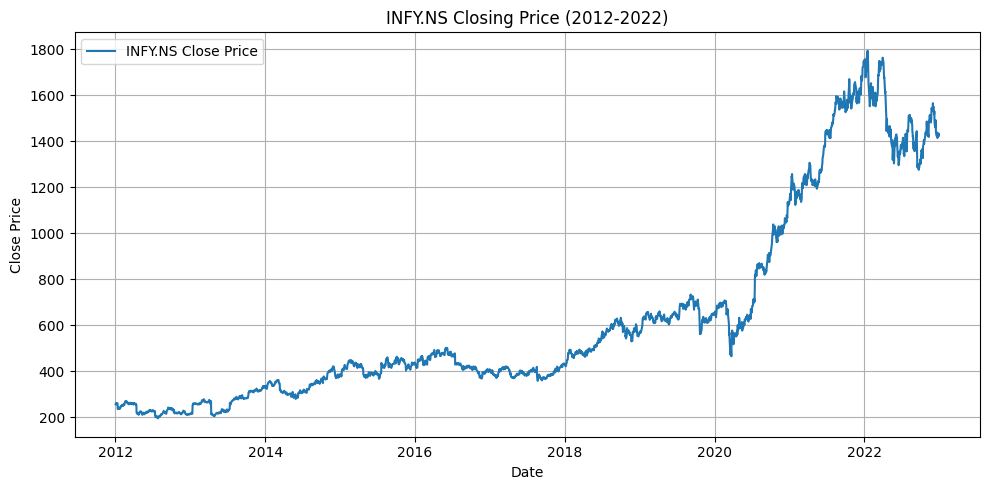

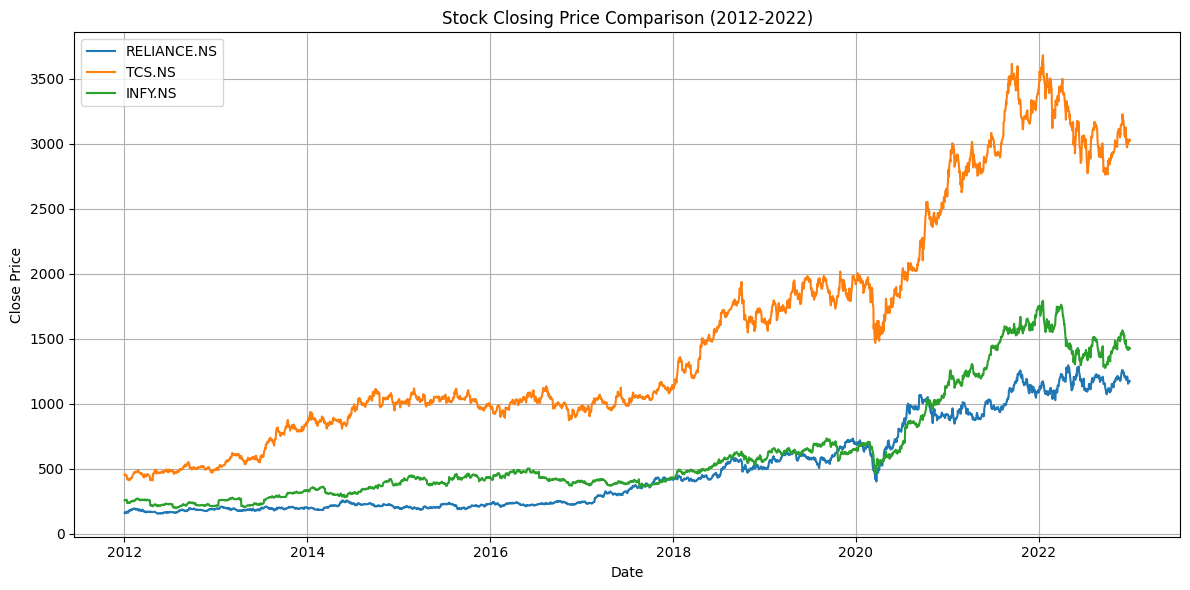

In [4]:
symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']

start_date = '2012-01-01'
end_date = '2022-12-31'

reliance_data = download_historical_data(symbols[0], start_date, end_date)
tcs_data = download_historical_data(symbols[1], start_date, end_date)
infy_data = download_historical_data(symbols[2], start_date, end_date)

print("RELIANCE:")
print(reliance_data.head())

print("\nTCS:")
print(tcs_data.head())

print("\nINFY:")
print(infy_data.head())

import matplotlib.pyplot as plt


def plot_stock(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label=f'{symbol} Close Price')
    plt.title(f'{symbol} Closing Price (2012-2022)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting separately
plot_stock(reliance_data, 'RELIANCE.NS')
plot_stock(tcs_data, 'TCS.NS')
plot_stock(infy_data, 'INFY.NS')

# Combine closing prices into one DataFrame for comparison
combined_df = reliance_data[['Close']].rename(columns={'Close': 'RELIANCE.NS'})
combined_df['TCS.NS'] = tcs_data['Close']
combined_df['INFY.NS'] = infy_data['Close']

# Plot all three stocks on the same chart
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['RELIANCE.NS'], label='RELIANCE.NS')
plt.plot(combined_df.index, combined_df['TCS.NS'], label='TCS.NS')
plt.plot(combined_df.index, combined_df['INFY.NS'], label='INFY.NS')

plt.title('Stock Closing Price Comparison (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Technical Analysis 

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph 
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

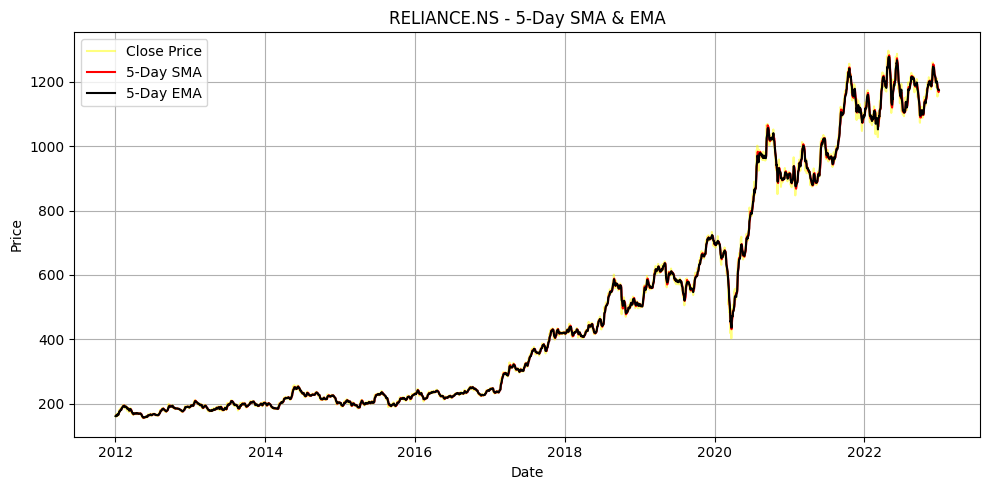

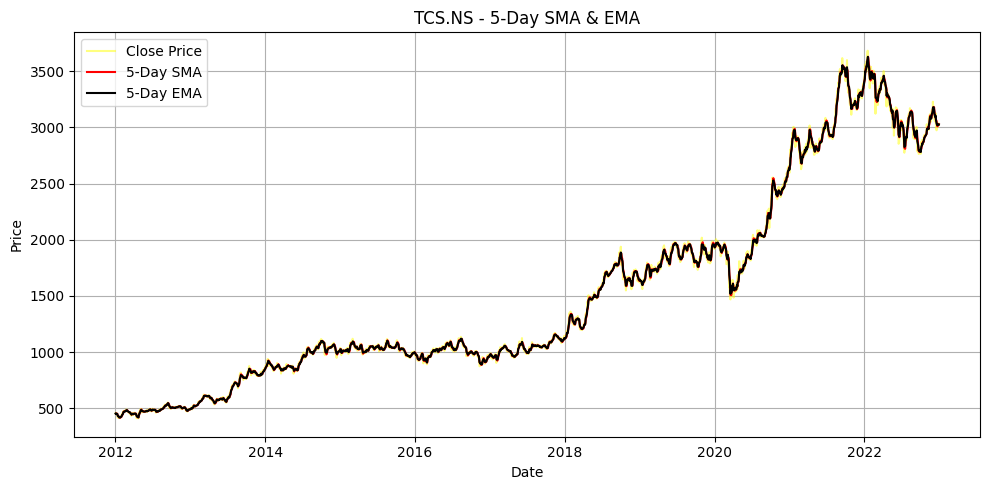

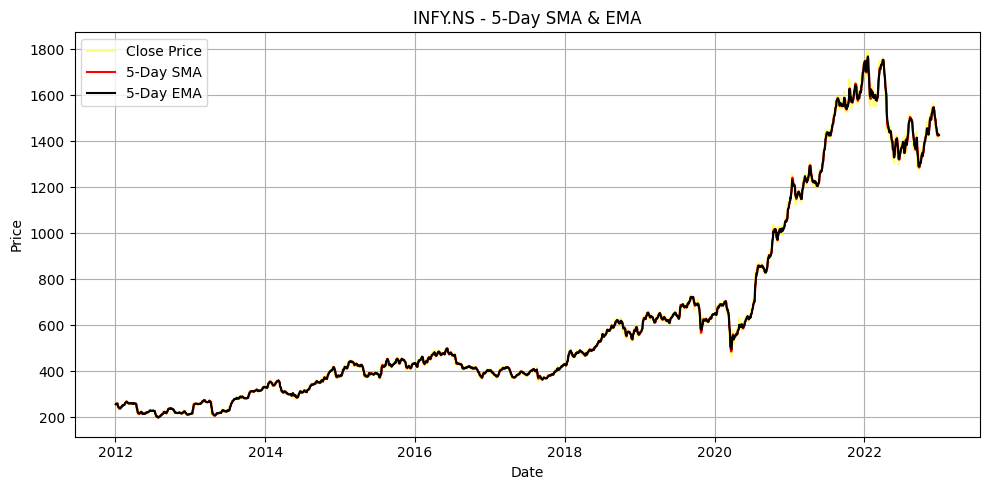

In [5]:
import matplotlib.pyplot as plt

# Function to calculate and plot 5-day SMA and EMA for a given DataFrame and stock name
def plot_sma_ema(df, stock_name):
    # Calculate 5-day SMA and EMA
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5, color='yellow')
    plt.plot(df.index, df['SMA_5'], label='5-Day SMA', color='red')
    plt.plot(df.index, df['EMA_5'], label='5-Day EMA', color='black')
    
    plt.title(f'{stock_name} - 5-Day SMA & EMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply to all three stocks
plot_sma_ema(reliance_data.copy(), 'RELIANCE.NS')
plot_sma_ema(tcs_data.copy(), 'TCS.NS')
plot_sma_ema(infy_data.copy(), 'INFY.NS')
 

**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods

    

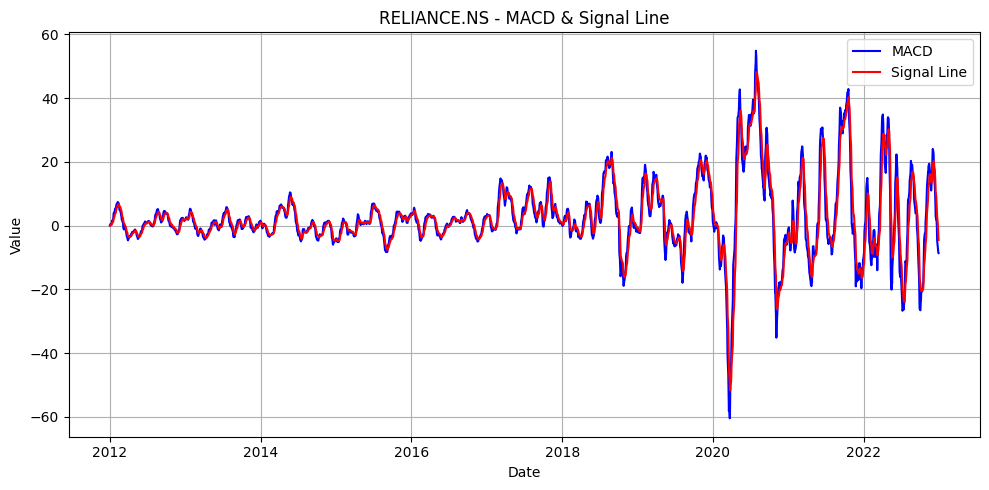

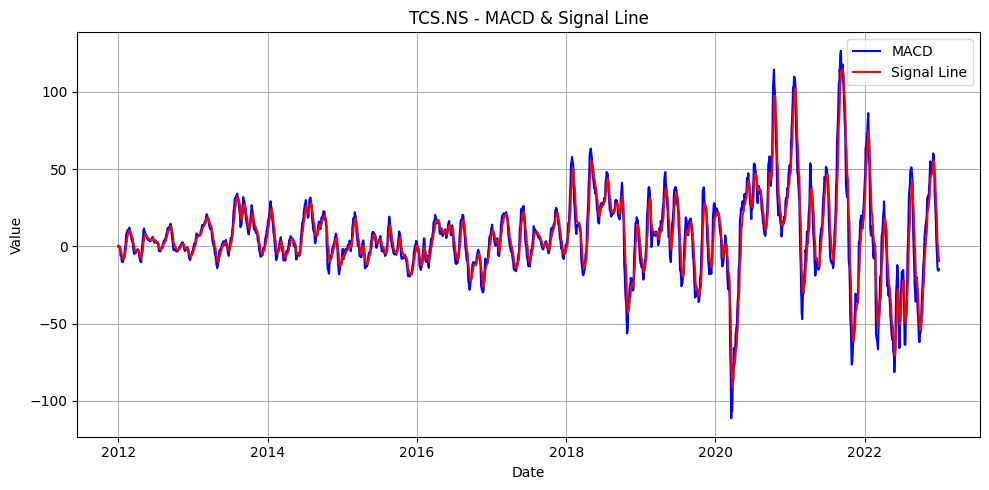

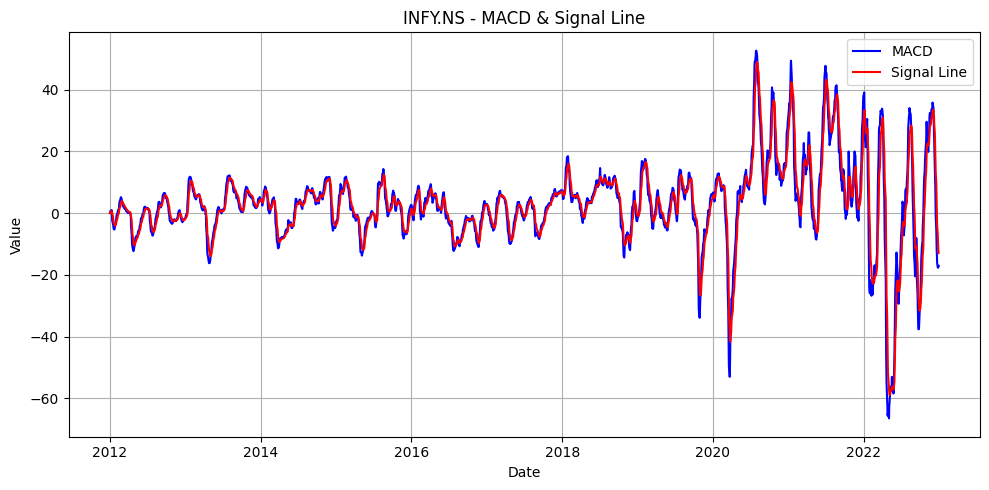

In [6]:
def plot_macd(df, stock_name):
    # Calculate EMAs
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # Calculate MACD and Signal Line
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Plot MACD and Signal Line
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red')
    plt.title(f'{stock_name} - MACD & Signal Line')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_macd(reliance_data.copy(), 'RELIANCE.NS')
plot_macd(tcs_data.copy(), 'TCS.NS')
plot_macd(infy_data.copy(), 'INFY.NS')


**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days 
   - Also show the overbought and oversold regions 
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   
    

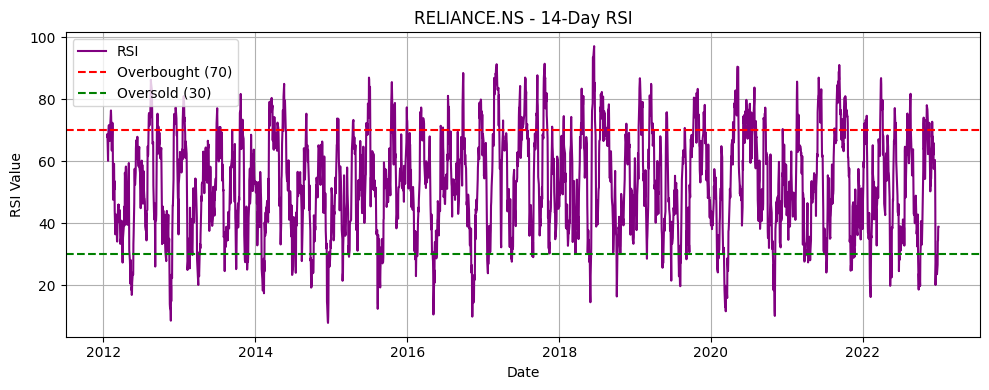

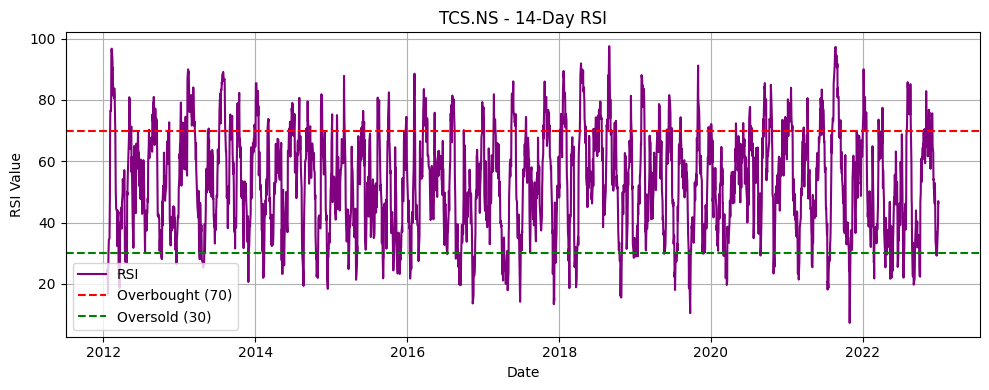

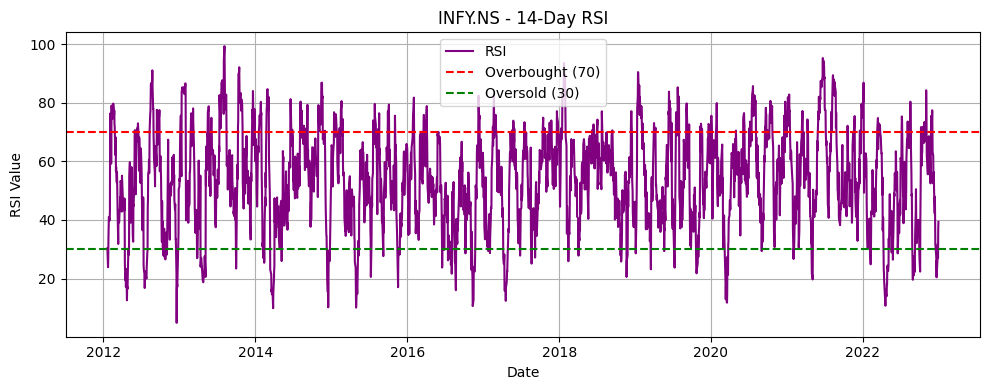

In [7]:
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df['RSI'] = rsi
    return df
def plot_rsi(df, stock_name):
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')

    # Overbought and Oversold lines
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    plt.title(f'{stock_name} - 14-Day RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

reliance_data = calculate_rsi(reliance_data.copy())
tcs_data = calculate_rsi(tcs_data.copy())
infy_data = calculate_rsi(infy_data.copy())

# Plot RSI for each stock
plot_rsi(reliance_data, 'RELIANCE.NS')
plot_rsi(tcs_data, 'TCS.NS')
plot_rsi(infy_data, 'INFY.NS')

### Summarize your analysis


We analyzed the stocks RELIANCE.NS, TCS.NS, and INFY.NS using various technical indicators to understand their price trends and trading signals between 2012 and 2022. Daily stock data was fetched and visualized through individual and combined closing price plots. To identify trends, we applied the 5-day Simple Moving Average (SMA) and Exponential Moving Average (EMA), where the EMA gave faster reactions to price changes. Momentum was further analyzed using the MACD (Moving Average Convergence Divergence), calculated from the 12-day and 26-day EMAs, along with its 9-day Signal Line. Crossover points between MACD and the Signal Line were used to identify possible buy and sell opportunities. Finally, the 14-day Relative Strength Index (RSI) was used to detect overbought (above 70) and oversold (below 30) conditions. Together, these indicators provided insights into each stock’s momentum, trend strength, and potential trading signals.